In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

data = pd.read_csv('/Users/surv/Documents/ML_Training/mltrainingv1/decision-tree/bikes.csv')

In [2]:
data.head()

,date,temperature,humidity,windspeed,count
0,2011-01-03,2.716070,45.715346,21.414957,120.0
1,2011-01-04,2.896673,54.267219,15.136882,108.0
2,2011-01-05,4.235654,45.697702,17.034578,82.0
3,2011-01-06,3.112643,50.237349,10.091568,88.0
4,2011-01-07,2.723918,49.144928,15.738204,148.0


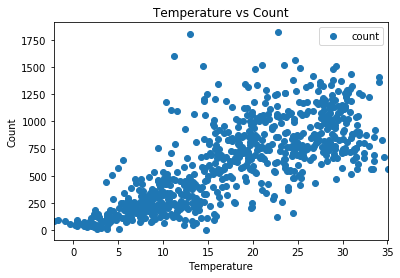

In [3]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
data.plot(x='temperature', y='count', style='o')
plt.title('Temperature vs Count')  
plt.xlabel('Temperature')  
plt.ylabel('Count')  
plt.show()

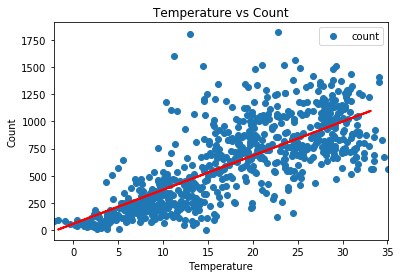

In [4]:
from sklearn.linear_model import LinearRegression

X = data['temperature'].values.reshape(-1,1)
y = data['count'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm
y_pred = regressor.predict(X_test)
data.plot(x='temperature', y='count', style='o')
plt.title('Temperature vs Count')  
plt.xlabel('Temperature')  
plt.ylabel('Count')  
plt.plot(X_test, y_pred, color='red', linewidth=2)


<h1>Simple Linear Regression</h1>

Simple Linear Regression Score:  0.5525964844032316


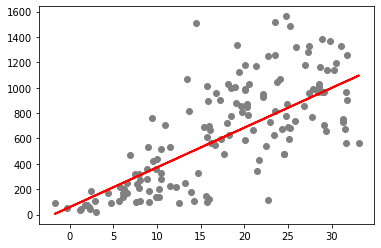

In [5]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
print("Simple Linear Regression Score: ", regressor.score(X_train, y_train))

<h1>Multiple Linear Regression</h1>

In [6]:
data = pd.read_csv('/Users/surv/Documents/ML_Training/mltrainingv1/decision-tree/bikes.csv')
data.drop(['date'], 1, inplace=True)
X = np.array(data.drop(['count'], 1))
y = np.array(data['count'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
print("Multiple Linear Regression Score: ", regressor.score(X_train, y_train))

Multiple Linear Regression Score:  0.6147115320120307


<h1>Polynomial Regression</h1>

In [7]:
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error, r2_score

data = pd.read_csv('/Users/surv/Documents/ML_Training/mltrainingv1/decision-tree/bikes.csv')
X = data['temperature'].values.reshape(-1,1)
y = data['count'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

poly = PolynomialFeatures(degree = 4) 
X_poly = poly.fit_transform(X) 
  
poly.fit(X_poly, y) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y)


y_poly_pred = lin2.predict(X_poly)
rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)

print("Polynomial Regression Score: ", r2)

Polynomial Regression Score:  0.5803522012847595


In [8]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline

data = pd.read_csv('/Users/surv/Documents/ML_Training/mltrainingv1/decision-tree/bikes.csv')
X = data['temperature'].values.reshape(-1,1)
y = data['count'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = make_pipeline(PolynomialFeatures(degree=1), Ridge())
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
print("Ridge Regression Score: ", score)

Ridge Regression Score:  0.5968116878581942


In [9]:
from sklearn.linear_model import Lasso

data = pd.read_csv('/Users/surv/Documents/ML_Training/mltrainingv1/decision-tree/bikes.csv')
X = data['temperature'].values.reshape(-1,1)
y = data['count'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = make_pipeline(PolynomialFeatures(degree=5), Lasso())
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
print("Lasso Linear Regression Score: ", score)

Lasso Linear Regression Score:  0.5018886748039073


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17144065.839197993, tolerance: 8537.076735143892
  positive)
